In [3]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
from modules import globals
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [4]:
folders = utility.list_all_folders(globals.data_path,"60-60-86-6")

../data/output-measure-surface/su4-60-60-86-6/beta-10.80-twist-1-60-60-86-6 , index: 0
../data/output-measure-surface/su4-60-60-86-6/beta-10.80-twist-2-60-60-86-6 , index: 1
../data/output-measure-surface/su4-60-60-86-6/beta-10.82-twist-1-60-60-86-6 , index: 2
../data/output-measure-surface/su4-60-60-86-6/beta-10.82-twist-2-60-60-86-6 , index: 3
../data/output-measure-surface/su4-60-60-86-6/beta-10.83-twist-1-60-60-86-6 , index: 4
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-1-60-60-86-6 , index: 5
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-2-60-60-86-6 , index: 6
../data/output-measure-surface/su4-60-60-86-6/beta-11.5-twist-1-60-60-86-6 , index: 7
../data/output-measure-surface/su4-60-60-86-6/beta-11.5-twist-2-60-60-86-6 , index: 8


In [38]:
from modules.globals import folder_names

smooth_surfaces= {}
choose_folder = 0
folder = folders[choose_folder]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface


In [34]:
smooth_surfaces = dict(sorted(smooth_surfaces.items(), key=lambda item: int(item[0])))

In [35]:
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['44', '44', '64', '6'], $\beta=$ 10.85, twist coeff $=$ 2

Smearing Level: 0
Smearing Level: 2
Smearing Level: 5
Smearing Level: 10
Smearing Level: 20
Smearing Level: 30


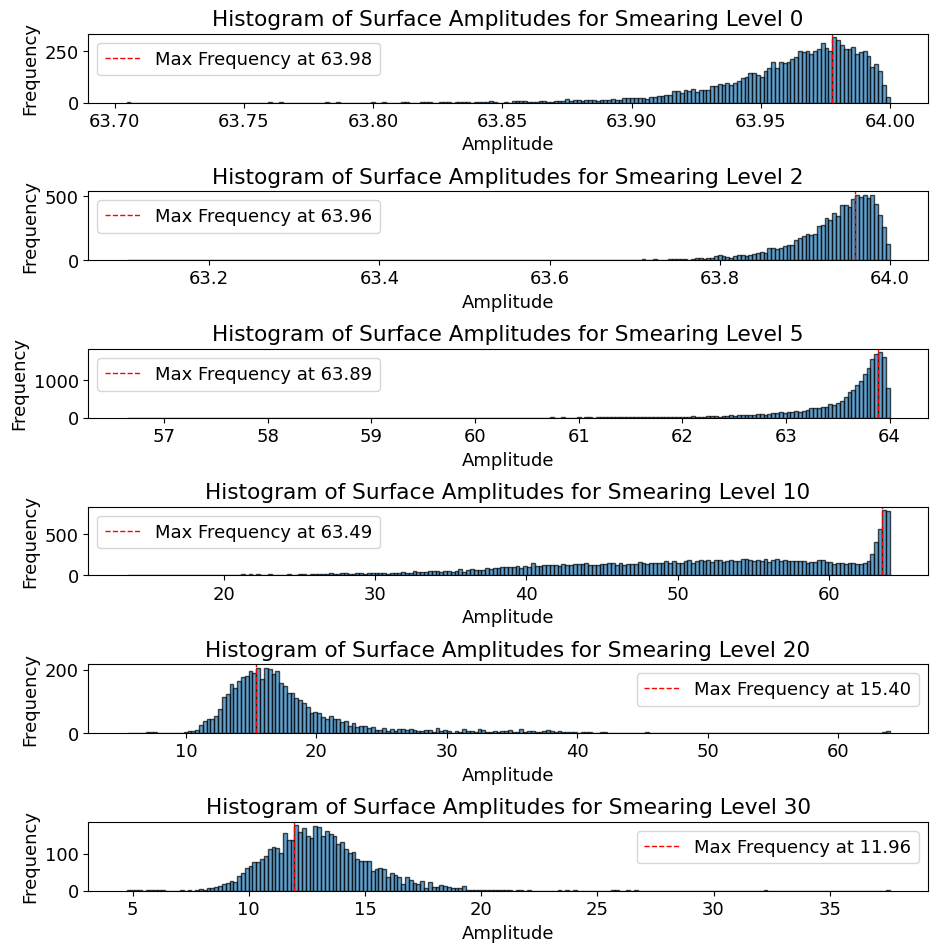

{'0': (63.96187752752752, 63.7046, 63.9998), '2': (63.93299576576576, 63.102999999999994, 63.999300000000005), '5': (63.5303900250125, 56.638000000000005, 63.999399999999994), '10': (50.78202395747874, 13.564799999999998, 63.9987), '20': (17.89884637867936, 5.45718, 63.9363), '30': (13.04411513252505, 4.74111, 37.5735)}


In [36]:
indices = sf.surface_amplitudes(smooth_surfaces=smooth_surfaces, return_threshold=40,thermalization=10)

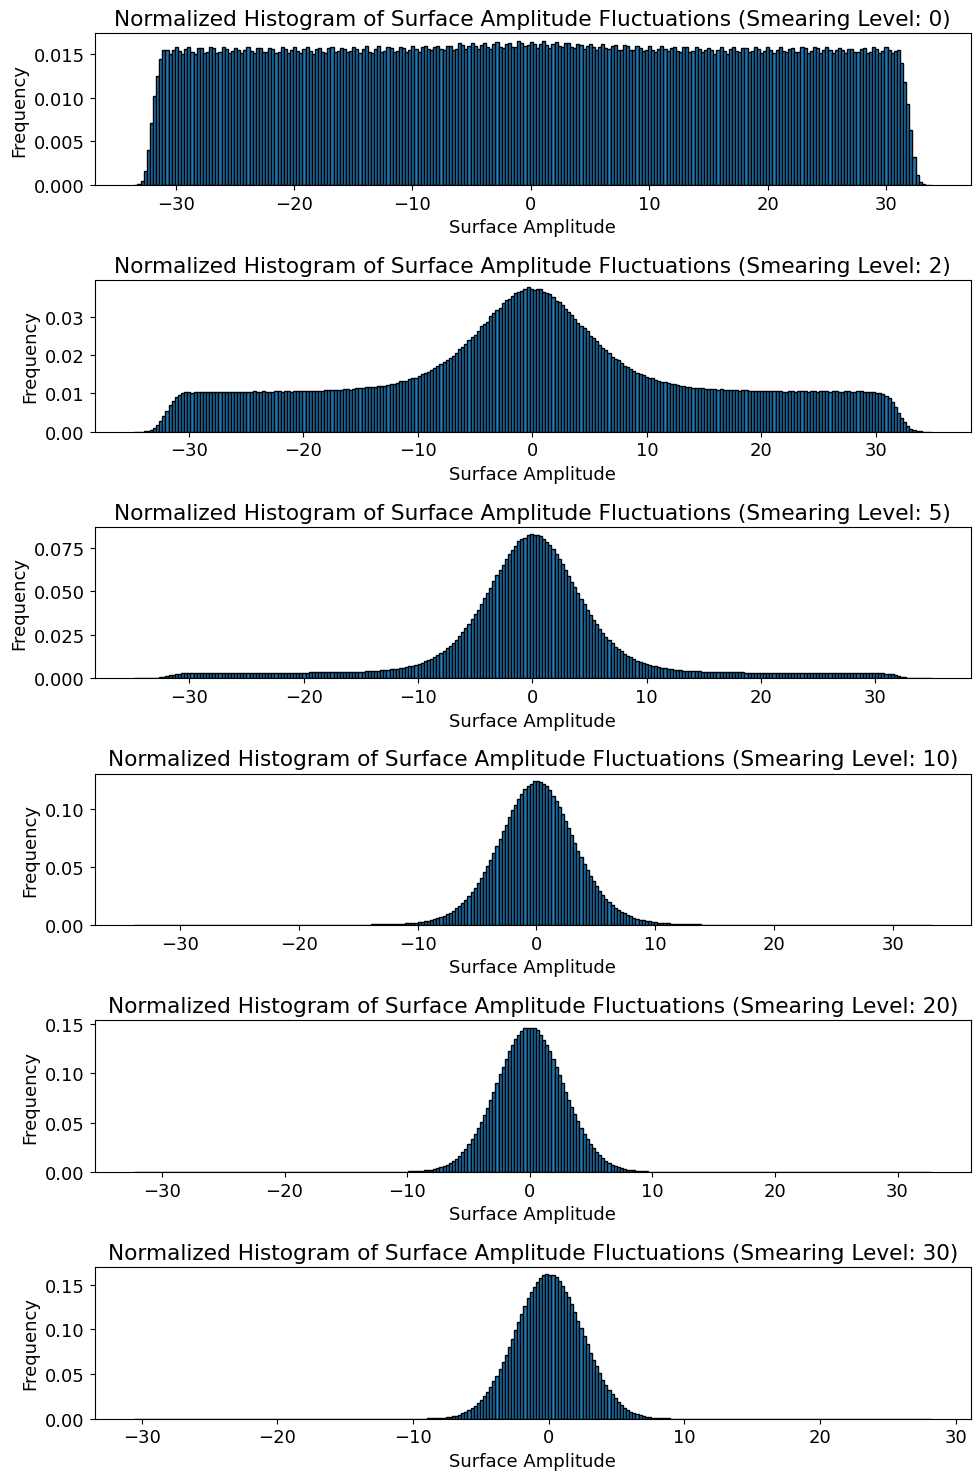

In [37]:
# Create a dictionary to store fluctuations for each smearing level
fluctuations_dict = {}
thermalization = 1000
plt.rcParams.update({'font.size': 13})

for smearing_level, surface_data in smooth_surfaces.items():
    post_thermalization_data = surface_data[thermalization:thermalization+10000]
    mean_z_values = np.mean(post_thermalization_data[:, :, 2], axis=1)
    fluctuations = post_thermalization_data[:, :, 2] - mean_z_values[:, np.newaxis]
    fluctuations_dict[smearing_level] = fluctuations.flatten()
    
# Plotting all histograms in subplots
num_plots = len(fluctuations_dict)
fig, axes = plt.subplots(num_plots, 1, figsize=(10,15))

for ax, (smearing_level, fluctuations) in zip(axes, fluctuations_dict.items()):
    ax.hist(fluctuations, edgecolor='black', bins=64*4, density=True)
    ax.set_xlabel('Surface Amplitude')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Normalized Histogram of Surface Amplitude Fluctuations (Smearing Level: {smearing_level})')

plt.tight_layout()
plt.show()
